In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [62]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [63]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=["sex","smoker"], drop_first=True,dtype=int)
df.columns = ["age", "bmi", "child", "region", "charges", "sex", "smoker"] #sex-->1-male, 0-female; smoker-->1-yes, 0-no
df

,age,bmi,child,region,charges,sex,smoker
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,1,0
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


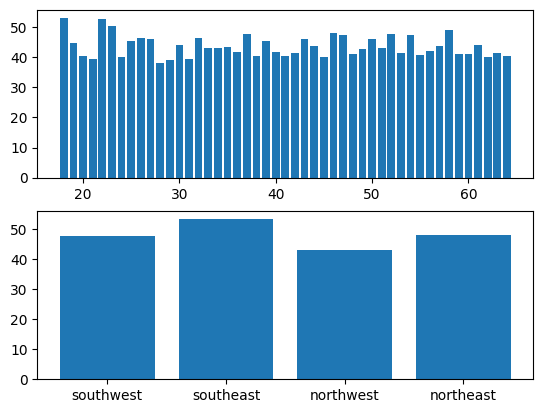

In [79]:
plt.subplot(2,1,1)
plt.bar(df.age,df.bmi)
plt.subplot(2,1,2)
plt.bar(df.region, df.bmi)
plt.show()

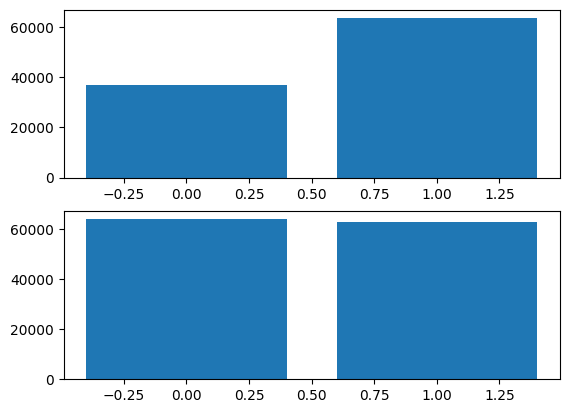

In [93]:
plt.subplot(2,1,1)
plt.bar(df.smoker,df.charges)
plt.subplot(2,1,2)
plt.bar(df.sex,df.charges)
plt.show()

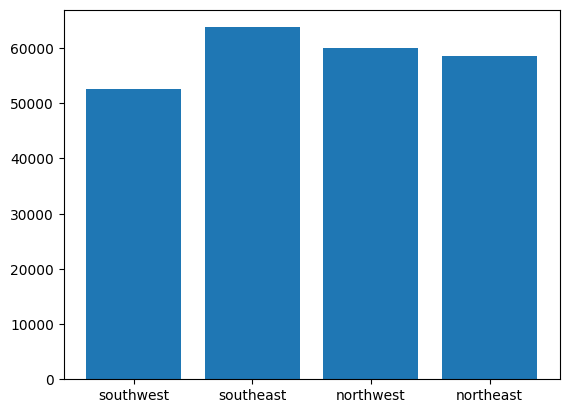

In [95]:
plt.bar(df.region,df.charges)
plt.show()

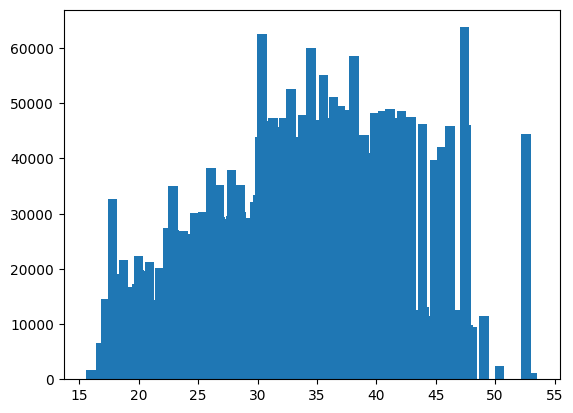

In [96]:
plt.bar(df.bmi,df.charges)
plt.show()

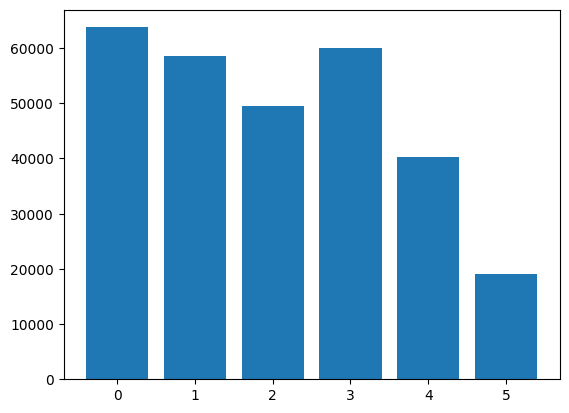

In [97]:
plt.bar(df.child,df.charges)
plt.show()

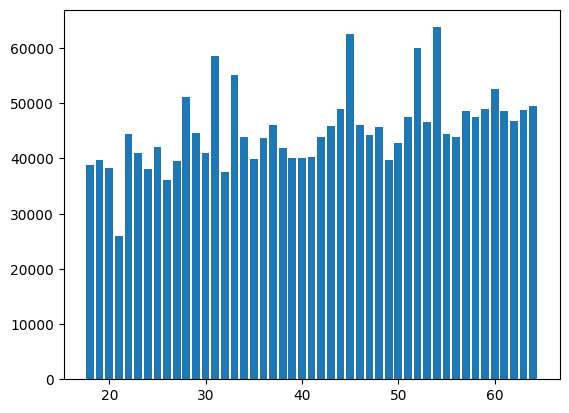

In [98]:
plt.bar(df.age,df.charges)
plt.show()

In [232]:
from sklearn.model_selection import train_test_split

x = df.drop(["charges","region","child","sex"], axis=1)
y = df.charges

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [234]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()

l.fit(x_train, y_train)

LinearRegression()

In [235]:
res = l.predict(x_test)

In [236]:
res[:5]

array([ 2942.85296281,  8429.51027198, 14355.14051231,  -546.15718512,
       37329.90741801])

In [237]:
y_test[:5]

684     4766.02200
716     9566.99090
264    20462.99766
680     2585.26900
244    29523.16560
Name: charges, dtype: float64

In [238]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,res)

35811881.99921619

In [240]:
36249513>=35811881

True